Flag detected: Red on top, White on bottom.
Detection result: True


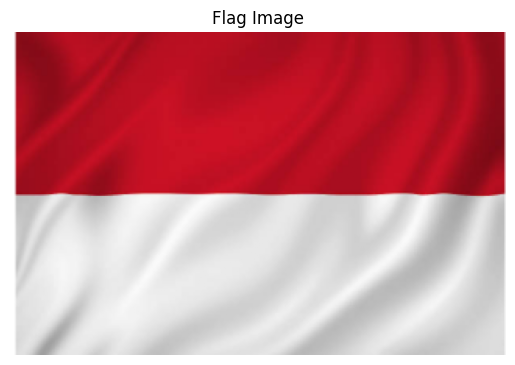

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_red_white_flag(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return False

    # Resize the image for consistent processing
    image = cv2.resize(image, (300, 200))  # Normalize size

    # Convert the image to HSV color space for better color detection
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define HSV ranges for RED color (two ranges because red wraps around in HSV)
    lower_red1 = np.array([0, 70, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 70, 50])
    upper_red2 = np.array([180, 255, 255])

    # Define HSV ranges for WHITE color
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 30, 255])

    # Create masks for red and white
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Calculate the percentage of red and white pixels in the top and bottom halves
    height, width = mask_red.shape
    top_half = slice(0, height // 2)
    bottom_half = slice(height // 2, height)

    red_top_ratio = np.sum(mask_red[top_half]) / (height * width / 2)
    white_bottom_ratio = np.sum(mask_white[bottom_half]) / (height * width / 2)

    white_top_ratio = np.sum(mask_white[top_half]) / (height * width / 2)
    red_bottom_ratio = np.sum(mask_red[bottom_half]) / (height * width / 2)

    # Thresholds to confirm flag detection
    if red_top_ratio > 50 and white_bottom_ratio > 50:
        print("Flag detected: Red on top, White on bottom.")
        return True
    elif white_top_ratio > 50 and red_bottom_ratio > 50:
        print("Flag detected: White on top, Red on bottom.")
        return True
    else:
        print("No red-and-white flag detected.")
        return False

# Test the function with your image
image_path = "C:\\Users\\Saket\\Desktop\\assignemnt 1\\Screenshot 2024-12-17 175950.png"  # Update the file path
x=plt.imread(image_path)
plt.axis('off')
plt.title("Flag Image")
plt.imshow(x)


flag_detected = detect_red_white_flag(image_path)
print("Detection result:", flag_detected)
